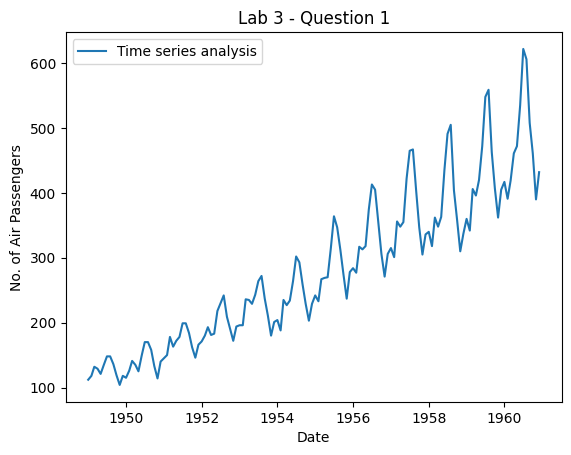

In [22]:
import pandas as pd

data = pd.read_csv('AirPassengers.csv')
data['date'] = pd.to_datetime(data['date'])
data.head()

import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(data)
df.set_index('date', inplace=True)
df.head()

plt.plot(data['date'], data['value'], label = 'Time series analysis')
# plt.plot(x, y1, label='Line 1')
# plt.plot(x, y2, label='Line 2')
plt.xlabel('Date')
plt.ylabel('No. of Air Passengers')
plt.title('Lab 3 - Question 1')
plt.legend()
plt.show()

In [27]:
df['SMA'] = df['value'].rolling(window=5).mean()
df['MSTD'] = df['value'].rolling(window=5).std()
df.head()



,value,SMA,MSTD
date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,122.4,8.142481


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

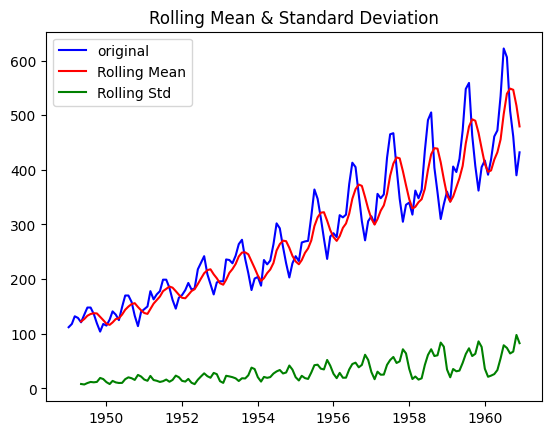

In [26]:
plt.plot(df["value"], color = 'blue', label='original')
plt.plot(df['SMA'], color = 'red', label='Rolling Mean')
plt.plot(df['MSTD'], color = 'green', label='Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
# ADF Test 
# Null hyopothesis data is non stationary
# alternate data is stationary
# if test static <  criticakl value and p-value <0.05 then reject null hypothesis

def adf_test(df):
    print("Results of Dickey Fuller Test: ")
    dftest = adfuller(df, autolag="AIC")
    dfoutput = pd.Series(dftest[0.4], index = ["Test Statistic","p-value", "Number of observations used"])
    for key,value in dftest[4].items():
        dfoutput{'Critical value'}

<Axes: xlabel='date'>

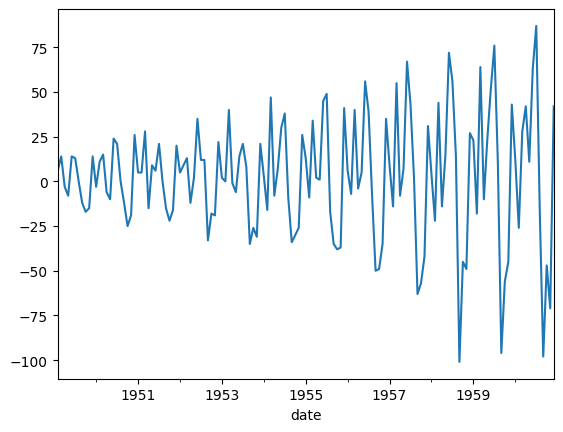

In [30]:
df["value_diff"] = df["value"] - df['value'].shift(1)
df['value_diff'].dropna().plot()

<Axes: xlabel='date'>

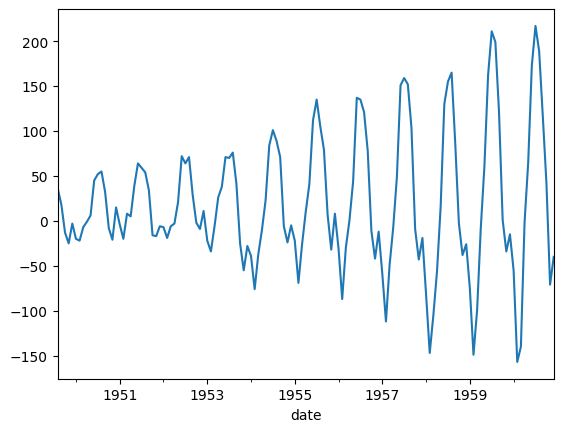

In [31]:
# seasonal differencing
n =7
df["value_sdiff"] = df["value"] - df['value'].shift(n)
df['value_sdiff'].dropna().plot()

In [33]:
# transformation
df['log_value'] = np.log(df['value'])
df.head()


,value,SMA,MSTD,value_diff,value_sdiff,log_value
date,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499
1949-02-01,118,NaN,NaN,6.0,NaN,4.770685
1949-03-01,132,NaN,NaN,14.0,NaN,4.882802
1949-04-01,129,NaN,NaN,-3.0,NaN,4.859812
1949-05-01,121,122.4,8.142481,-8.0,NaN,4.795791


In [34]:
df["log_diff"] = df["log_value"] - df['log_value'].shift(1)
df.head()


,value,SMA,MSTD,value_diff,value_sdiff,log_value,log_diff
date,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,NaN
1949-02-01,118,NaN,NaN,6.0,NaN,4.770685,0.052186
1949-03-01,132,NaN,NaN,14.0,NaN,4.882802,0.112117
1949-04-01,129,NaN,NaN,-3.0,NaN,4.859812,-0.022990
1949-05-01,121,122.4,8.142481,-8.0,NaN,4.795791,-0.064022


In [37]:
df['SMA_log'] = df['log_value'].rolling(window=5).mean()
df['MSTD_log'] = df['log_value'].rolling(window=5).std()
df.head(10)

,value,SMA,MSTD,value_diff,value_sdiff,log_value,log_diff,SMA_log,MSTD_log
date,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0,NaN,4.770685,0.052186,NaN,NaN
1949-03-01,132,NaN,NaN,14.0,NaN,4.882802,0.112117,NaN,NaN
1949-04-01,129,NaN,NaN,-3.0,NaN,4.859812,-0.022990,NaN,NaN
1949-05-01,121,122.4,8.142481,-8.0,NaN,4.795791,-0.064022,4.805518,0.066710
1949-06-01,135,127.0,7.245688,14.0,NaN,4.905275,0.109484,4.842873,0.057453
1949-07-01,148,133.0,9.874209,13.0,NaN,4.997212,0.091937,4.888178,0.073399
1949-08-01,148,136.2,11.861703,0.0,36.0,4.997212,0.000000,4.911060,0.087737
1949-09-01,136,137.6,11.193748,-12.0,18.0,4.912655,-0.084557,4.921629,0.083080


<Axes: xlabel='date'>

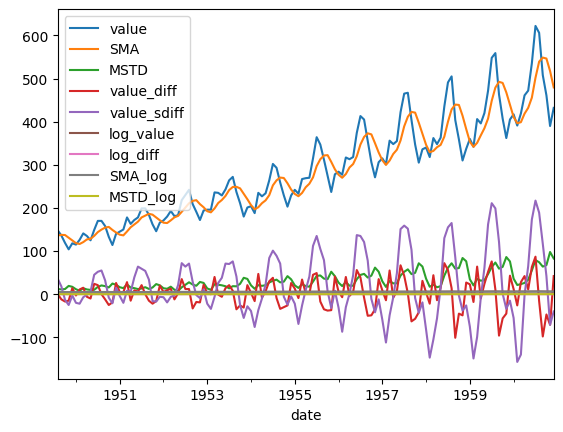

In [38]:
df.dropna().plot()

In [ ]:
#run stationary test for log value and check the hypothesis



c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


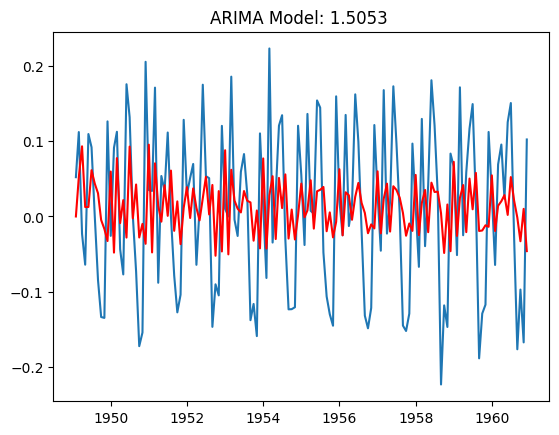

In [40]:
from statsmodels.tsa.arima.model import ARIMA

ts_log = df['log_value'].diff().dropna()
model1 = ARIMA(ts_log, order=(2,1,2))
result_AR = model1.fit()
plt.plot(ts_log)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('ARIMA Model: %.4f '%sum((result_AR.fittedvalues - ts_log)**2))
plt.show()
